In [1]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Doc du lieu
df = pd.read_csv("/content/data.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
# Xem classficiton
df['Classification'].value_counts()
df['Classification'] = df['Classification'] - 1

In [6]:
df['Classification'].value_counts()

1    64
0    52
Name: Classification, dtype: int64

In [8]:
# Tạo dữ liệu để train model

y = df['Classification'].values.reshape(-1,1)

X = df.drop(columns=['Classification'])



In [9]:
print(X.shape)
print(y.shape)

(116, 9)
(116, 1)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.1)

In [24]:
# Xay dung cay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

my_tree = DecisionTreeClassifier(splitter='random')
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [25]:
# Du doan tren du lieu test

y_pred = my_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[6 3]
 [2 1]]


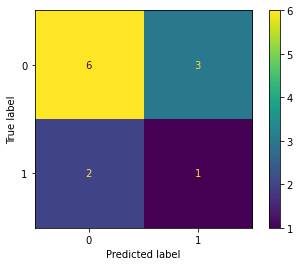

In [26]:
plot_confusion_matrix(my_tree, X_test, y_test)

In [27]:
df = pd.read_csv("/content/datareg.csv")
df.head()

,Product,Cost,Profit
0,'Asset Flip',100,1000
1,'Text Based',500,3000
2,'Visual Novel',1500,5000
3,'2D Pixel Art',3500,8000
4,'2D Vector Art',5000,6500


In [28]:
# Tạo dữ liệu

X = df['Cost'].values.reshape(-1,1)
y= df['Profit'].values.reshape(-1,1)

In [30]:
from sklearn.tree import DecisionTreeRegressor

my_tree = DecisionTreeRegressor()
my_tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
X_test = [[4500]]

y_pred = my_tree.predict(X_test)
print(y_pred)

[6500.]


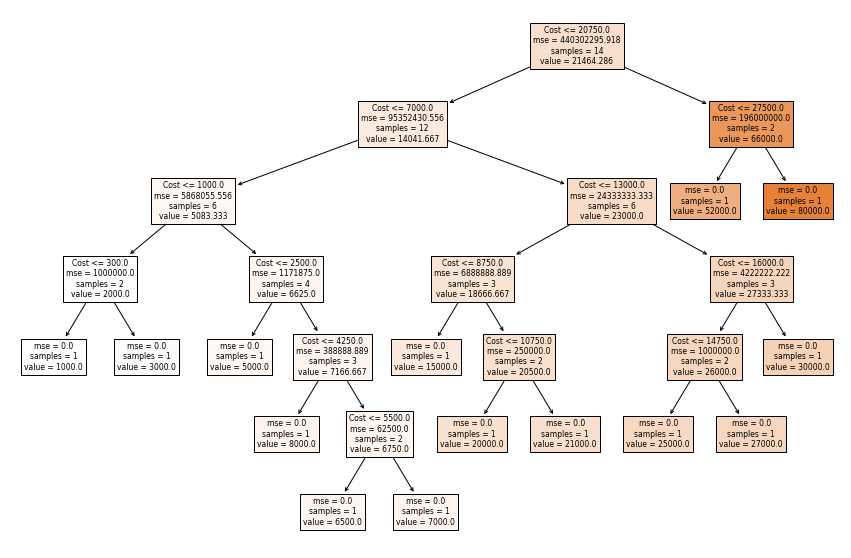

In [36]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(my_tree, feature_names=['Cost'], class_names=['Profit'], filled=True)